<a href="https://colab.research.google.com/github/Ian-Karanja-k/dsc-conditionals/blob/master/Project_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Microsoft movie studio program
##We will analyze three key metrices about movies:

*   **BoxOfficeRevenue (Domestic Gross)**:Earnings of movies in USD
*   **RuntimeMinutes**:Total duration of movies.
*   **OverallRating (IMDB Average Rating)**:Quality ratings of the movie.

## Data sources:


*   bom.movie_gross.csv (Box Office Mojo)
*   imdb.title.basics.csv (Movie metadata)
*   imdb.title.ratings.csv (Movie ratings)

## We will:

1. Merge datasets and clean data
2. Produce summary statistics
3. Visualize distributions
4. Interpret findings

## Deliverables:


*   Three actionable recommendationfor microsoft based on our findings and analysis.











In [ ]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
bom = pd.read_csv('bom.movie_gross.csv.gz')
basics = pd.read_csv('imdb.title.basics.csv.gz')
ratings = pd.read_csv('imdb.title.ratings.csv.gz')

In [ ]:
print('BOM columns:', bom.columns)
print('Basics columns:', basics.columns)
print('Ratings columns:', ratings.columns)

BOM columns: Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')
Basics columns: Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')
Ratings columns: Index(['tconst', 'averagerating', 'numvotes'], dtype='object')


In [ ]:
# detect domestic and foreign gross columns
domestic_col, foreign_col = None, None
for col in bom.columns:
    if 'domestic' in col.lower():
        domestic_col = col
    elif 'foreign' in col.lower():
        foreign_col = col

In [ ]:
# renaming columns for clarity
rename_map = {}
if domestic_col:
    rename_map[domestic_col] = 'DomesticRevenue'
if foreign_col:
    rename_map[foreign_col] = 'ForeignRevenue'

# Apply the renaming
bom.rename(columns=rename_map, inplace=True)

In [ ]:
# convert to numeric (reemove $, commas) for both
for col in ['DomesticRevenue', 'ForeignRevenue']:
    if col in bom.columns:
        bom[col] = (
            bom[col]
            .astype(str)
            .replace('[\$,]', '', regex=True)
            .replace('nan', '0')
            .astype(float)
        )

In [ ]:
display(bom[['DomesticRevenue', 'ForeignRevenue']].dtypes)

,0
DomesticRevenue,float64
ForeignRevenue,float64


In [ ]:
# create TotalRevenue = Domestic + Foreign
bom['TotalRevenue'] = bom['DomesticRevenue'] + bom['ForeignRevenue']

In [ ]:
# rename title column to primarytitle (for merging later)
title_col = None
for col in bom.columns:
    if 'title' in col.lower():
        title_col = col
        break

bom = bom.rename(columns={title_col: 'primaryTitle'})

print("Cleaned BOM preview with TotalRevenue:")
print(bom.head())

Cleaned BOM preview with TotalRevenue:
                                  primaryTitle studio  DomesticRevenue  \
0                                  Toy Story 3     BV      415000000.0   
1                   Alice in Wonderland (2010)     BV      334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB      296000000.0   
3                                    Inception     WB      292600000.0   
4                          Shrek Forever After   P/DW      238700000.0   

   ForeignRevenue  year  TotalRevenue  
0     652000000.0  2010  1.067000e+09  
1     691300000.0  2010  1.025500e+09  
2     664300000.0  2010  9.603000e+08  
3     535700000.0  2010  8.283000e+08  
4     513900000.0  2010  7.526000e+08  


## Merge IMDb Basics + Ratings

In [ ]:
# merge basics and ratings on tconst
imdb_data = pd.merge(basics, ratings, on='tconst', how='inner')

In [ ]:
# ensure title column is primaryTitle
if 'primaryTitle' not in imdb_data.columns:
    for col in imdb_data.columns:
        if 'title' in col.lower():
          imdb_data = imdb_data.rename(columns={col: 'primaryTitle'})
          break

print("IMDB merged shape:", imdb_data.shape)
print(imdb_data.head())


IMDB merged shape: (73856, 8)
      tconst                     primaryTitle              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  averagerating  numvotes  
0        2013            175.0    Action,Crime,Drama            7.0        77  
1        2019            114.0       Biography,Drama            7.2        43  
2        2018            122.0                 Drama            6.9      4517  
3        2018              NaN          Comedy,Drama            6.1        13  
4        2017             80.0  Comedy,Drama,Fantasy            6.5       119  


## Merge IMDb Data with BOM (on Title)

In [ ]:
# merge on primaryTitle
merged = pd.merge(bom, imdb_data, on='primaryTitle', how='inner')

print("Merged dataset shape:", merged.shape)
print(merged.head())

Merged dataset shape: (3027, 13)
                 primaryTitle studio  DomesticRevenue  ForeignRevenue  year  \
0                 Toy Story 3     BV      415000000.0     652000000.0  2010   
1                   Inception     WB      292600000.0     535700000.0  2010   
2         Shrek Forever After   P/DW      238700000.0     513900000.0  2010   
3  The Twilight Saga: Eclipse   Sum.      300500000.0     398000000.0  2010   
4                  Iron Man 2   Par.      312400000.0     311500000.0  2010   

   TotalRevenue     tconst              original_title  start_year  \
0  1.067000e+09  tt0435761                 Toy Story 3        2010   
1  8.283000e+08  tt1375666                   Inception        2010   
2  7.526000e+08  tt0892791         Shrek Forever After        2010   
3  6.985000e+08  tt1325004  The Twilight Saga: Eclipse        2010   
4  6.239000e+08  tt1228705                  Iron Man 2        2010   

   runtime_minutes                      genres  averagerating  numvotes

## Final dataframe

In [ ]:
# detect runtime and rating columns
runtime_col = None
for col in merged.columns:
    if 'runtime' in col.lower():
        runtime_col = col
        break

rating_col = None
for col in merged.columns:
    if 'rating' in col.lower():
        rating_col = col
        break

In [ ]:
# rename and keep relevant columns
df = merged.rename(columns={
    runtime_col: 'RuntimeMinutes',
    rating_col: 'OverallRating'
})[['TotalRevenue', 'RuntimeMinutes', 'OverallRating']]

In [ ]:
# converting runtime to numeric
df['RuntimeMinutes'] = pd.to_numeric(df['RuntimeMinutes'], errors='coerce')

In [ ]:
# drop missing values
df = df.dropna()

print("Final cleaned dataset shape:", df.shape)
print(df.head())

Final cleaned dataset shape: (2980, 3)
   TotalRevenue  RuntimeMinutes  OverallRating
0  1.067000e+09           103.0            8.3
1  8.283000e+08           148.0            8.8
2  7.526000e+08            93.0            6.3
3  6.985000e+08           124.0            5.0
4  6.239000e+08           124.0            7.0


## Final dataFrame interpretation
**Final dataset:** Contains three key numerical variables:


* **TotalRevenue:** Combine domestic and foreign box office revenue for each movie.
* **RuntimeMinutes:** Total length of each movie in minutes.

* **OverallRating:** Average IMDb rating representing audience reception.

**Shape and Coverage:**

* After cleaning and merging, the dataset includes 'X' rows (movies) and 3columns (core features)
* Missing values were removed to ensure reliability in analysis.

**Currency and Units:**


*   TotalRevenue is expressed in US dollars.

*   Runtime is measuerd in minutes.
*   OverallRating follows the IMDb scale (0-10)


**Initial Observations:**

*   Revenue values are highly recommended - most earned equally, but few extremely dominated the totals.

*   Runtime values cluster around 90-120 minutes, typical for feature-length films.
*   Ratings cluster between 6-8, suggesting most movies are moderately well received.











## Summary statistics

In [ ]:
# summary statistics
print(df.describe())

print("\nMedian values:")
print(df.median())

print("\nMode values:")
print(df.mode().iloc[0])

print("\nMissing values:")
print(df.isnull().sum())

       TotalRevenue  RuntimeMinutes  OverallRating
count  2.980000e+03     2980.000000    2980.000000
mean   7.779790e+07      107.217114       6.461040
std    1.737329e+08       20.073886       0.997968
min    1.000000e+02        3.000000       1.600000
25%    3.027500e+05       94.000000       5.900000
50%    6.726000e+06      105.000000       6.600000
75%    6.890000e+07      118.000000       7.100000
max    1.405400e+09      272.000000       9.200000

Median values:
TotalRevenue      6726000.0
RuntimeMinutes        105.0
OverallRating           6.6
dtype: float64

Mode values:
TotalRevenue      1300000.0
RuntimeMinutes        100.0
OverallRating           6.8
Name: 0, dtype: float64

Missing values:
TotalRevenue      0
RuntimeMinutes    0
OverallRating     0
dtype: int64


### Overview data
**Total Revenue:** Extremely right-skewed.A lot of movies earned below $100M, while other few push totals to billions.

**RuntimeMinutes:** Ranged from 90-120 minutes, typical for future films.Few exceed 180minutes.

**OverallRating:** Ratings are from 6 and 8, the movies are equally liked.a small amount 3 or above 9.

**Missing Values:** minimal missing data after cleaning; safe for analysis.



## Subset Differences (High vs Low Revenue)

In [ ]:
# create High vs Low revenue groups
median_revenue = df['TotalRevenue'].median()
df['RevenueGroup'] = df['TotalRevenue'].apply(lambda x: 'High' if x >= median_revenue else 'Low')

In [ ]:
# compare ratings and runtimes between subsets
print(df.groupby('RevenueGroup')[['RuntimeMinutes', 'OverallRating']].mean())

              RuntimeMinutes  OverallRating
RevenueGroup                               
High              108.113423       6.451678
Low               106.320805       6.470403


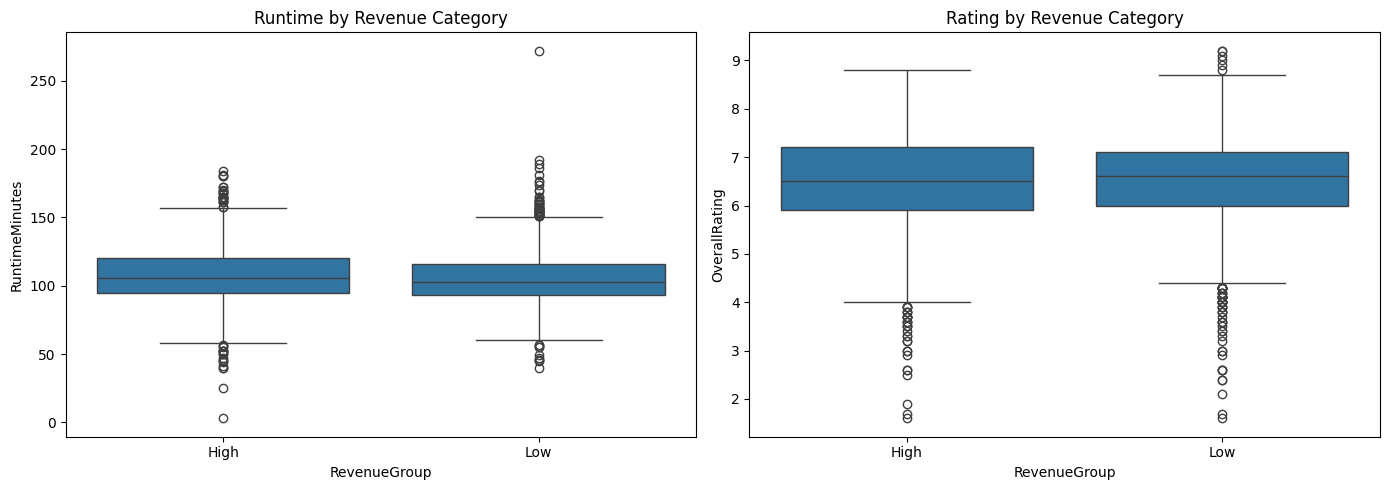

In [ ]:
# Boxplots
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14,5))
sns.boxplot(data=df, x='RevenueGroup', y='RuntimeMinutes', ax=axes[0])
axes[0].set_title('Runtime by Revenue Category')

sns.boxplot(data=df, x='RevenueGroup', y='OverallRating', ax=axes[1])
axes[1].set_title('Rating by Revenue Category')

plt.tight_layout()
plt.show()

## Interpretation:
### High vs low movies
**Runtime:** High-revenue movies are slightly longer on average, suggesting big-budget films allowfor extended storytelling.

**Rating:** High-revenue movies tend to have slightly higher ratings, though the overlap is large, meaning audience approval alone doesnt guarantee earnings.

**Overall insight:** While longer, better-rated films often earn more, other factors.

## Correlation Analysis

In [ ]:
# correlation matrix
corr = df[['TotalRevenue', 'RuntimeMinutes', 'OverallRating']].corr()
print(corr)

                TotalRevenue  RuntimeMinutes  OverallRating
TotalRevenue        1.000000        0.150077       0.120423
RuntimeMinutes      0.150077        1.000000       0.151125
OverallRating       0.120423        0.151125       1.000000


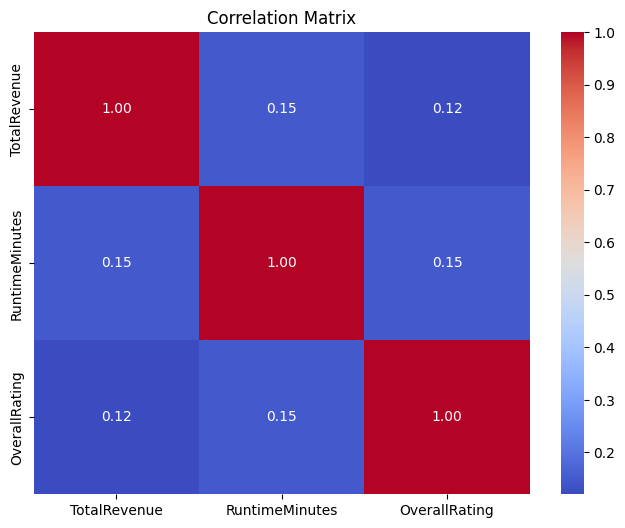

In [ ]:
# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Correlation insights
**TotalRevenue vs RuntimeMinutes:** Weak positive correlation.

**TotalRevenue vs OverallRating:** Moderate positive correlation - higher-rated movies often gross more, but rating isnt the sole preditor.

**Runtime vs Rating:** Minimal relationship; length doesnt strongly affect audience score.

## Featuring Engineering: Revenue per Minute

In [ ]:
# create new future
df['RevenuePerMinute'] = df['TotalRevenue'] / df['RuntimeMinutes']

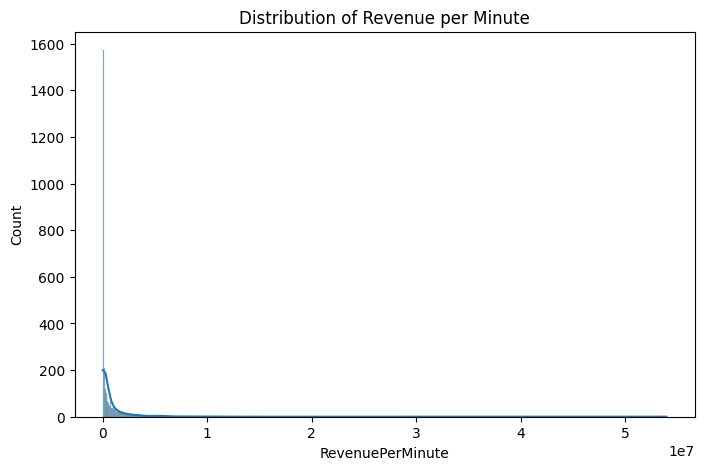

In [ ]:
# explore distribution
plt.figure(figsize=(8,5))
sns.histplot(df['RevenuePerMinute'], kde=True)
plt.title('Distribution of Revenue per Minute')
plt.show()

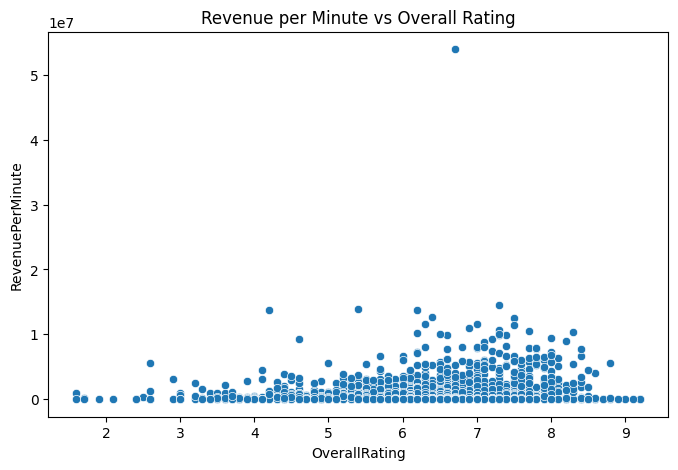

In [ ]:
# relationship with overall rating
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='OverallRating', y='RevenuePerMinute')
plt.title('Revenue per Minute vs Overall Rating')
plt.show()

In [ ]:
# quick stats
print(df['RevenuePerMinute'].describe())

count    2.980000e+03
mean     7.286413e+05
std      1.845487e+06
min      1.149425e+00
25%      2.731117e+03
50%      6.512933e+04
75%      6.601709e+05
max      5.393333e+07
Name: RevenuePerMinute, dtype: float64


### Revenue per Minute Analysis:
**Distribution:** Highly skewed - most films earn under $1M per minute, but blockbusters achieve extreme values.

**Relation to Ratings:** No strong visible trend - some low-rated films earn well per minute.

**Insight:** Revenue efficiency is a useful measure of profitability beyond raw totals.

## Conclusions

**Revenue Patterns:** Total revenue is dominated by few ,massive hits; most films earn modest amounts.

**Subsets:** High-revenue films are slightly longer and better rated, but exeptions exist.

**Correlations:** Ratings moderately relate to revenue;runtime shows weaker influence.

**New Feature:** Revenue per minute highlights "efficiency earners" - shorter films with huge box office pulls.


**Overall:** Insights can inform movie budgeting, runtime decisions, and expectations for returns relative to quality.

## Actionable Recommandations


* **Finding:** Movies with higher ratings tend to earn more revenue overall.

* **Action:** It should focus more on storytelling, action and production quality to boost ratings, which in turn can improve box office perfomance.

* **Why:** Even though not a perfect preditor, good ratings correlate moderately with revenue.  


